In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Reshape
import os
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
dataset = np.load('dataset/dataset.npz')

dataset contains four files
* arr_0 = train label
* arr_1 = train images
* arr_2 = test label
* arr_3 = test images

In [3]:
dataset.files

['arr_1', 'arr_0', 'arr_3', 'arr_2']

In [4]:
dataset.keys

<bound method Mapping.keys of <numpy.lib.npyio.NpzFile object at 0x10d605ac8>>

In [16]:
label_train = dataset['arr_1']
image_train = dataset['arr_0']
label_test = dataset['arr_3']
image_test = dataset['arr_2']

image_train = tf.keras.utils.normalize(image_train, axis=1)
image_test = tf.keras.utils.normalize(image_test, axis=1)

Print the length of train image

In [7]:
len(image_train)

78200

In [8]:
len(image_test)

13800

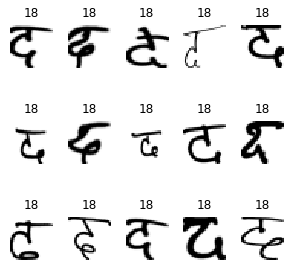

In [5]:
plt.figure(figsize=(5,5))
start_index = 7500
end_index = 7515
index = 1
for image, label in zip(image_train[start_index:end_index], label_train[start_index:end_index]):
    plt.subplot(3,5,index)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)
    index += 1

In [40]:
label_train

array([39, 39, 39, ..., 29, 29, 29])

In [38]:
image_train[0].shape

(32, 32)

In [17]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(image_train, label_train,epochs=8)

Epoch 1/8
78200/78200 [==============================] - 22s 275us/step - loss: 0.2470 - acc: 0.9247
Epoch 2/8
78200/78200 [==============================] - 22s 287us/step - loss: 0.2020 - acc: 0.9369
Epoch 3/8
78200/78200 [==============================] - 23s 295us/step - loss: 0.1730 - acc: 0.9447
Epoch 4/8
78200/78200 [==============================] - 19s 242us/step - loss: 0.1507 - acc: 0.9522
Epoch 5/8
78200/78200 [==============================] - 19s 238us/step - loss: 0.1342 - acc: 0.9577
Epoch 6/8
78200/78200 [==============================] - 20s 256us/step - loss: 0.1173 - acc: 0.9625
Epoch 7/8
78200/78200 [==============================] - 24s 302us/step - loss: 0.1060 - acc: 0.9645
Epoch 8/8
78200/78200 [==============================] - 23s 295us/step - loss: 0.0969 - acc: 0.9676


In [20]:
val_loss, val_acc = model.evaluate(image_test, label_test)
print(val_loss, val_acc)

13800/13800 [==============================] - 1s 79us/step
0.35086926690708553 0.9153623188405797


In [21]:
model.save('handwriting.model')

In [25]:
new_model = tf.keras.models.load_model('handwriting.model', compile=False)

In [38]:
img = np.expand_dims(image_test[0], axis = 0)
predictions = new_model.predict(img)
print(np.argmax(predictions[0]))

39


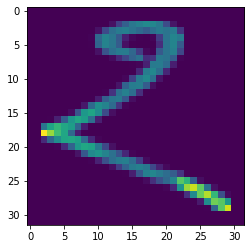

In [39]:
plt.imshow(image_test[0])

In [40]:
label_test[0]

39

In [41]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  131200    
_________________________________________________________________
dense_11 (Dense)             multiple                  16512     
_________________________________________________________________
dense_12 (Dense)             multiple                  6063      
Total params: 153,775
Trainable params: 153,775
Non-trainable params: 0
_________________________________________________________________
